#Get the Data


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"C:\Users\SATYA GAGAN SAI\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Take a Quick Look at the Data Structure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


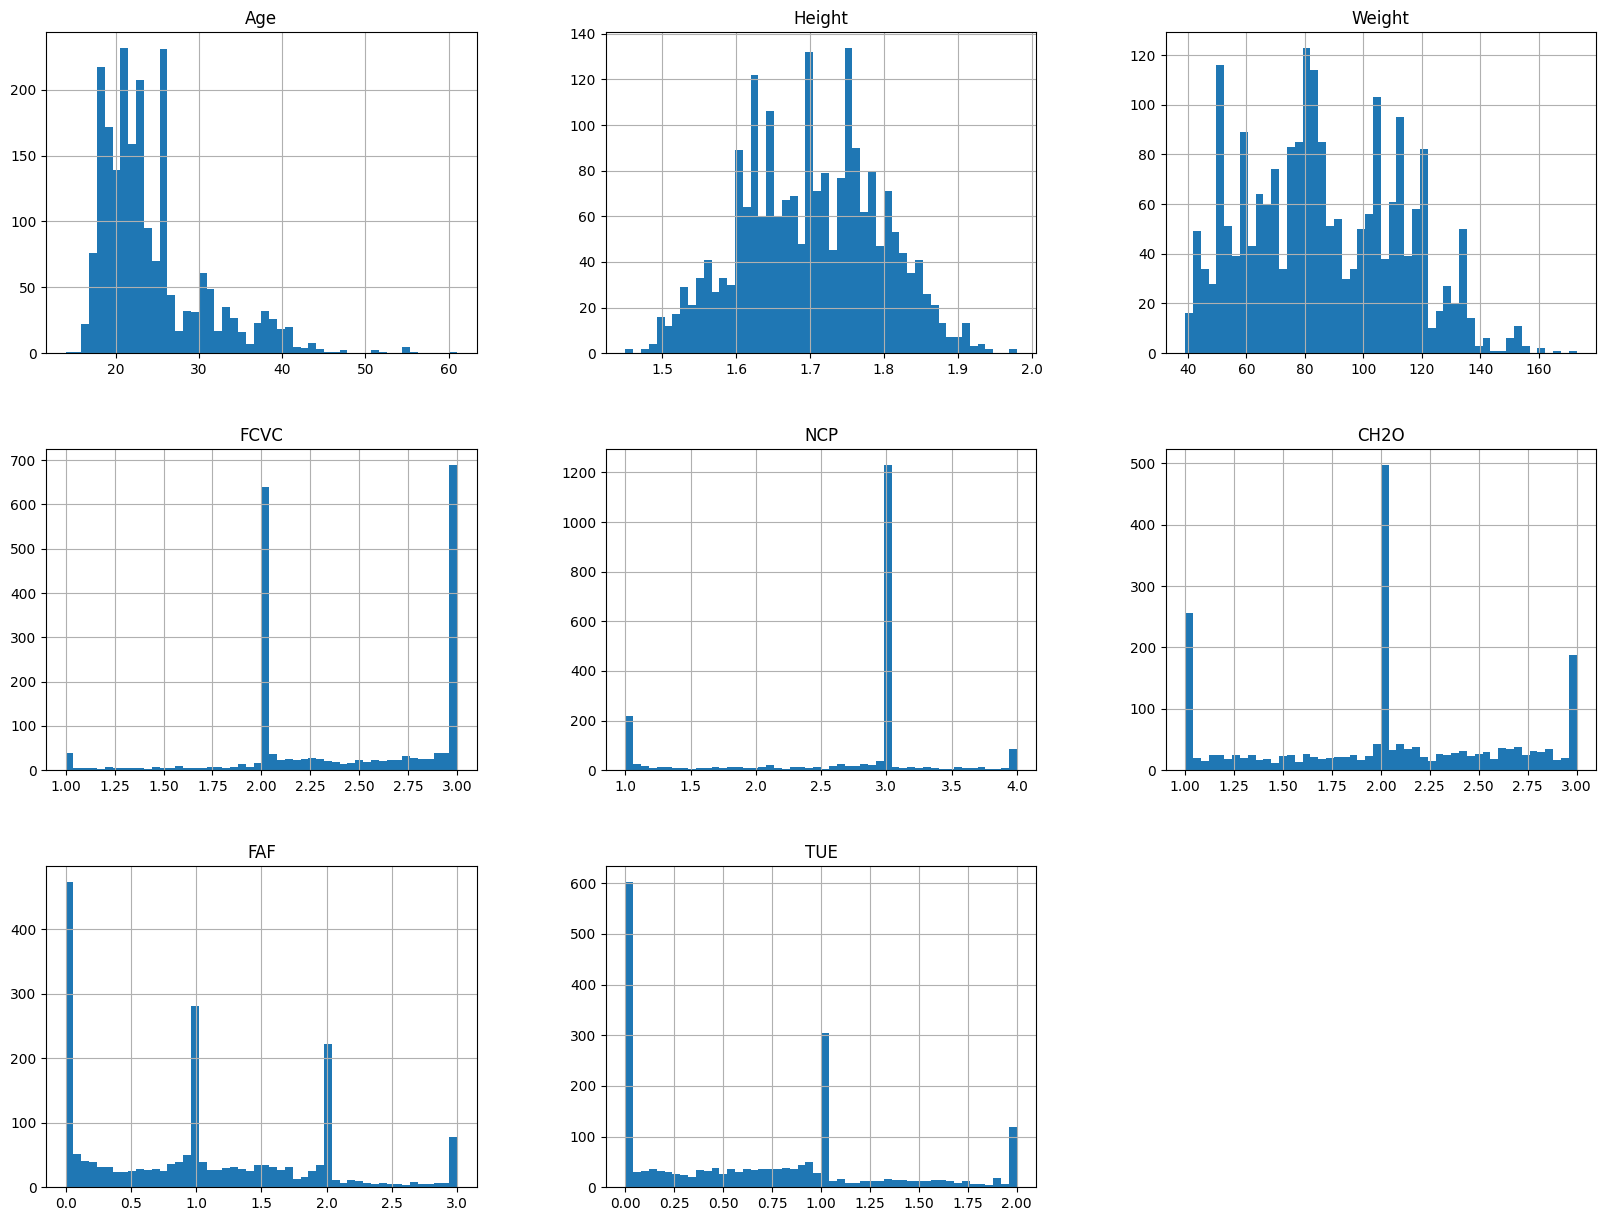

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Create a Test Set

In [11]:
import numpy as np
np.random.seed(42)

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(df, 0.2)
len(train_set)

1689

In [13]:
len(train_set)

1689

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [17]:
test_set.head()


,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
11,11,Female,21.0,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II
20,20,Male,22.0,1.65,80.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,2.0,no,Walking,Overweight_Level_II
23,23,Female,22.0,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
544,Female,20.406871,1.755978,53.699561,yes,yes,2.0,3.891994,Frequently,no,1.863930,no,2.870127,2.000000,no,Public_Transportation,Insufficient_Weight
1987,Female,26.000000,1.624950,111.004920,yes,yes,3.0,3.000000,Sometimes,no,2.704315,no,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
420,Male,18.000000,1.850000,60.000000,yes,yes,3.0,4.000000,Sometimes,no,2.000000,yes,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight
527,Female,21.000000,1.520000,42.000000,no,yes,3.0,1.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
196,Male,22.000000,1.750000,74.000000,yes,no,2.0,3.000000,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Bike,Normal_Weight


In [20]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming df is already loaded with the necessary columns
# We'll use 'NObeyesdad' as the categorical variable for stratification (obesity levels)

# 1. View unique categories in 'NObeyesdad'
print(df["NObeyesdad"].value_counts())



NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [27]:
# 2. Perform Stratified Shuffle Split on the 'NObeyesdad' variable
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["NObeyesdad"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# 3. Check the proportions in both training and test sets to ensure stratification worked
print("Stratified Train Set Proportions:")
print(strat_train_set["NObeyesdad"].value_counts() / len(strat_train_set))





Stratified Train Set Proportions:
NObeyesdad
Obesity_Type_I         0.166469
Obesity_Type_III       0.153436
Obesity_Type_II        0.140403
Overweight_Level_I     0.137441
Overweight_Level_II    0.137441
Normal_Weight          0.135664
Insufficient_Weight    0.129147
Name: count, dtype: float64


In [22]:
# 4. Compare with overall proportions in the entire dataset
print("\nOverall Proportions in the Full Dataset:")
print(df["NObeyesdad"].value_counts() / len(df))




Overall Proportions in the Full Dataset:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: count, dtype: float64


In [26]:
# 5. Remove the stratification column if necessary (in this case it's 'NObeyesdad', so we may want to keep it)
# If you want to drop it after splitting, you can do so like this:
# (For this case, we'll keep 'NObeyesdad' since it's a meaningful label, unlike 'income_cat' in the housing dataset)
#for set_ in (strat_train_set, strat_test_set):
 #   set_.drop("NObeyesdad", axis=1, inplace=True)
# 6. Display the stratified training and test sets (optional)
print("\nStratified Training Set:")
print(strat_train_set.head())




Stratified Training Set:
     Gender        Age    Height     Weight family_history_with_overweight  \
459    Male  19.000000  1.760000  79.000000                            yes   
426    Male  22.000000  1.750000  70.000000                             no   
326    Male  18.000000  1.700000  55.300000                            yes   
971    Male  19.506389  1.824449  87.656029                            yes   
892  Female  17.085250  1.535618  57.259124                             no   

    FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
459  yes  2.000000  3.000000  Frequently    no  3.000000   no  1.000000   
426   no  2.000000  3.000000   Sometimes    no  3.000000   no  1.000000   
326  yes  3.000000  3.000000   Sometimes    no  2.000000   no  3.000000   
971  yes  2.793561  3.788602   Sometimes    no  2.429059   no  2.094542   
892  yes  1.972545  2.339614   Sometimes    no  1.711074  yes  0.095517   

          TUE        CALC                 MTRANS  
459

Discover and Visualize the Data to Gain Insights

In [28]:
df = strat_train_set.copy()

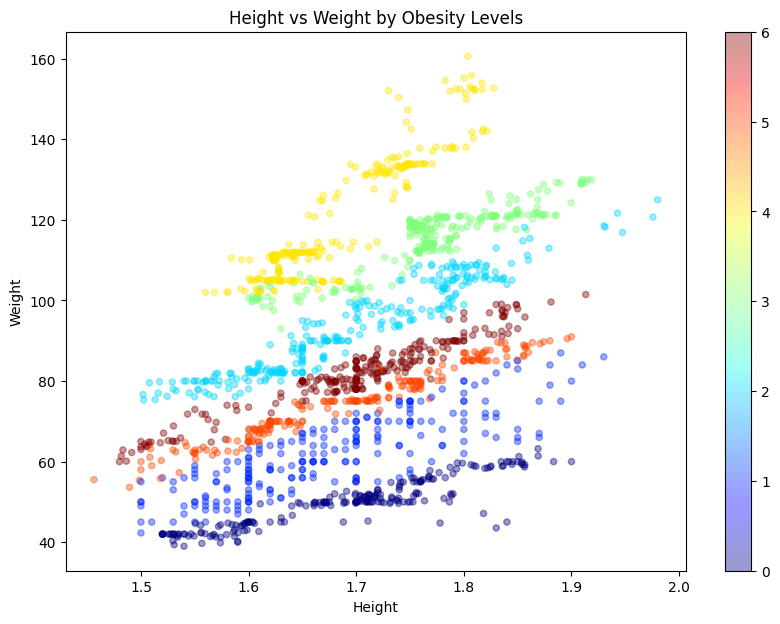

In [29]:
df.plot(kind="scatter", x="Height", y="Weight", alpha=0.4,
        c=df["NObeyesdad"].astype('category').cat.codes, cmap=plt.get_cmap("jet"),
        colorbar=True, figsize=(10,7))
plt.title("Height vs Weight by Obesity Levels")
plt.show()


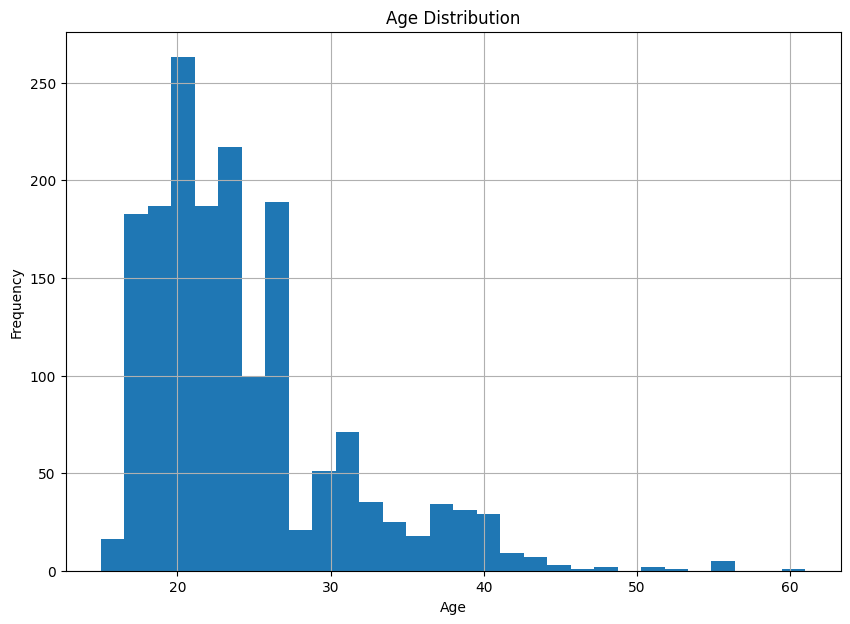

In [30]:
df["Age"].hist(bins=30, figsize=(10,7))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


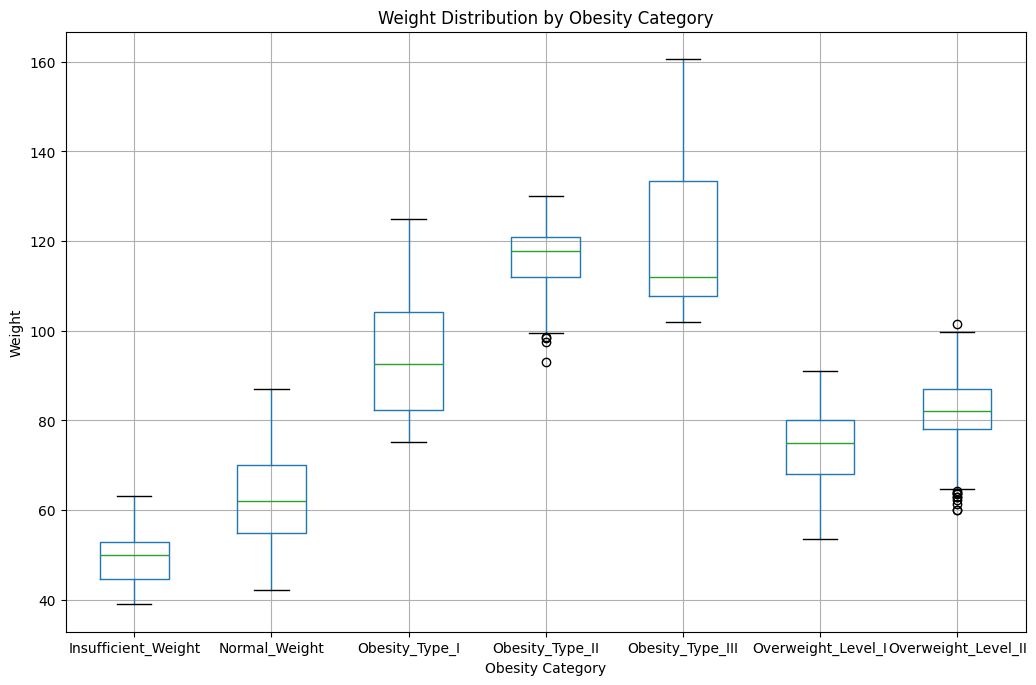

In [31]:
df.boxplot(column="Weight", by="NObeyesdad", figsize=(12,8))
plt.title("Weight Distribution by Obesity Category")
plt.xlabel("Obesity Category")
plt.ylabel("Weight")
plt.suptitle("")
plt.show()


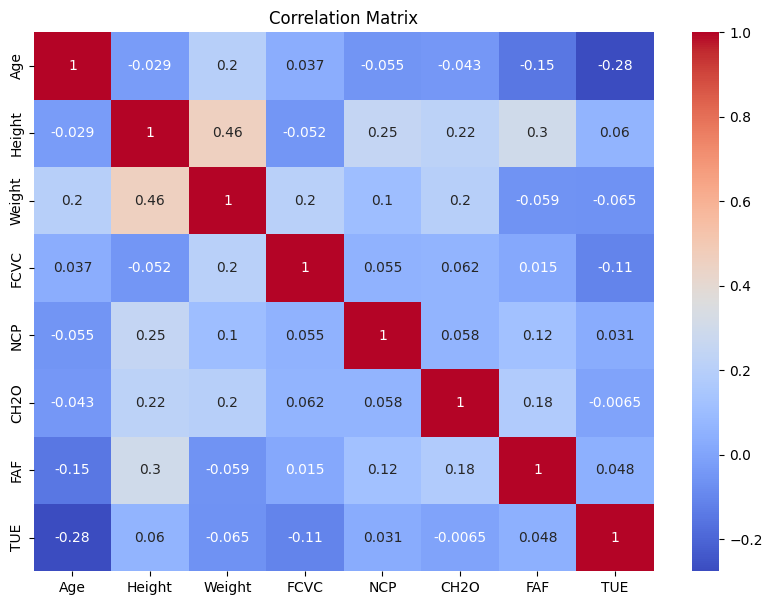

In [35]:
# Convert categorical columns like 'Gender' and 'NObeyesdad' to numeric if needed
# or drop non-numeric columns before calculating the correlation matrix

# 1. Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# 2. Compute the correlation matrix
corr_matrix = numeric_df.corr()

# 3. Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


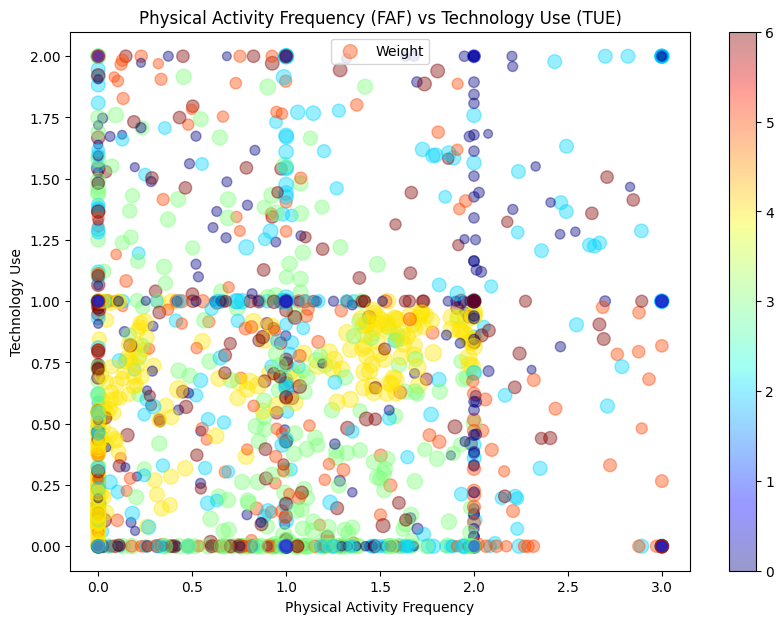

In [34]:
df.plot(kind="scatter", x="FAF", y="TUE", alpha=0.4,
        s=df["Weight"], label="Weight", figsize=(10,7),
        c=df["NObeyesdad"].astype('category').cat.codes, cmap=plt.get_cmap("jet"),
        colorbar=True)
plt.title("Physical Activity Frequency (FAF) vs Technology Use (TUE)")
plt.xlabel("Physical Activity Frequency")
plt.ylabel("Technology Use")
plt.legend()
plt.show()


Weight    1.000000
Height    0.456985
FCVC      0.203266
Age       0.199537
CH2O      0.198834
NCP       0.103019
FAF      -0.058715
TUE      -0.065273
Name: Weight, dtype: float64


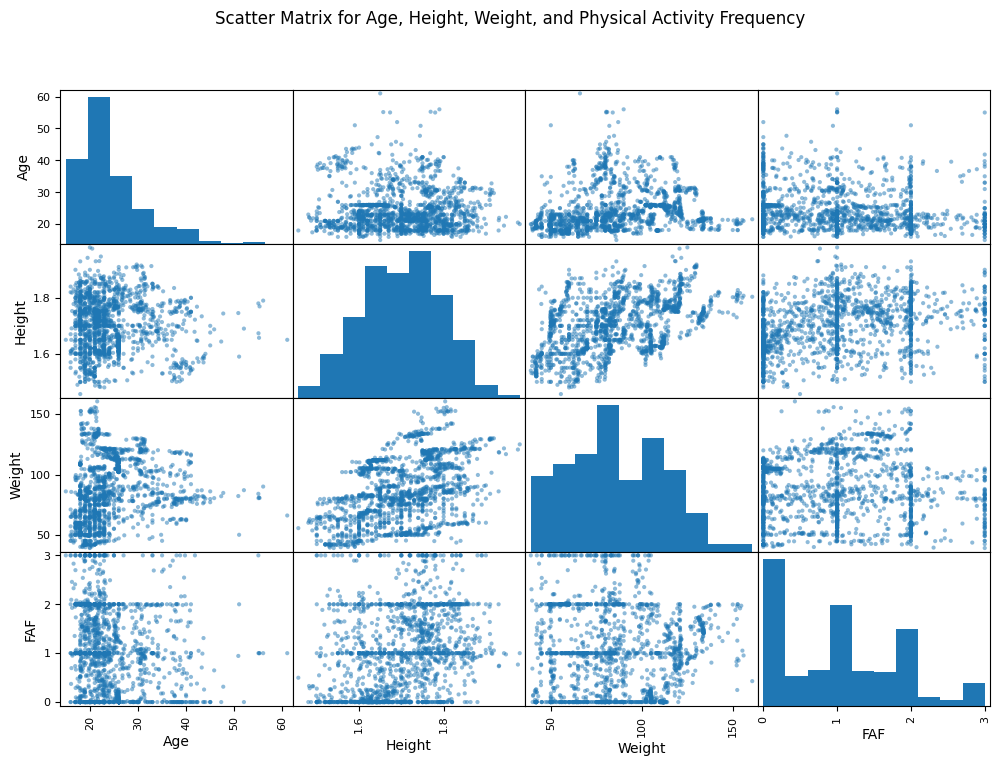

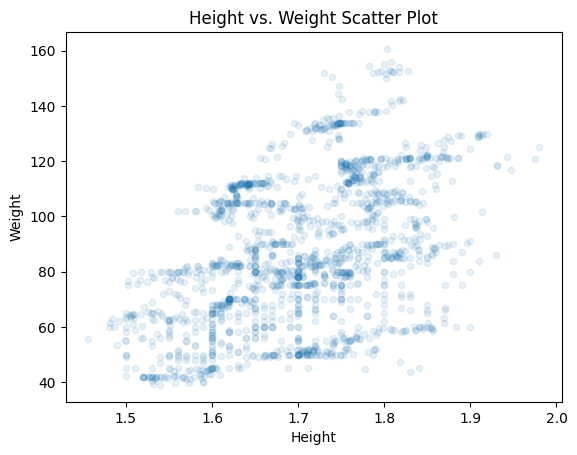

In [37]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Sort correlation with respect to 'Weight'
if 'Weight' in corr_matrix.columns:
    print(corr_matrix["Weight"].sort_values(ascending=False))
else:
    print("Column 'Weight' is not in the dataset.")

# Select attributes for the scatter matrix (make sure they are numeric)
attributes = ["Age", "Height", "Weight", "FAF"]  # Modify as needed based on your dataset

# Scatter matrix plot
from pandas.plotting import scatter_matrix
scatter_matrix(numeric_df[attributes], figsize=(12, 8))
plt.suptitle("Scatter Matrix for Age, Height, Weight, and Physical Activity Frequency")
plt.show()

# Scatter plot example between 'Height' and 'Weight'
df.plot(kind="scatter", x="Height", y="Weight", alpha=0.1)
plt.title("Height vs. Weight Scatter Plot")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()


C:\Users\SATYA GAGAN SAI\AppData\Local\Temp\ipykernel_168680\3111771923.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FAF"].fillna(0, inplace=True)
C:\Users\SATYA GAGAN SAI\AppData\Local\Temp\ipykernel_168680\3111771923.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Weight                  1.000000
BMI                     0.933228
Height                  0.456985
FCVC                    0.203266
Age                     0.199537
CH2O                    0.198834
NCP                     0.103019
FAF                    -0.058715
activity_vs_calories   -0.058715
TUE                    -0.065273
FAVC                         NaN
Name: Weight, dtype: float64


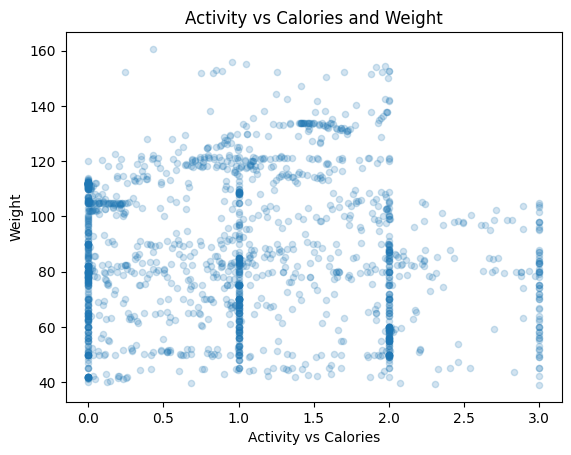

In [40]:
# 1. Convert relevant columns to numeric (FAF, FAVC)
df["FAF"] = pd.to_numeric(df["FAF"], errors='coerce')
df["FAVC"] = pd.to_numeric(df["FAVC"], errors='coerce')

# 2. Handle missing values or non-numeric values by filling them (optional)
df["FAF"].fillna(0, inplace=True)
df["FAVC"].fillna(1, inplace=True)  # To avoid division by zero

# 3. Create the new feature 'activity_vs_calories'
df["activity_vs_calories"] = df["FAF"] / df["FAVC"]

# 4. Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=[np.number])

# 5. Compute the correlation matrix on numeric data only
corr_matrix = numeric_df.corr()

# 6. Sort correlation values with respect to 'Weight'
if 'Weight' in corr_matrix.columns:
    print(corr_matrix["Weight"].sort_values(ascending=False))

# 7. Optionally, plot activity_vs_calories vs. Weight
df.plot(kind="scatter", x="activity_vs_calories", y="Weight", alpha=0.2)
plt.title("Activity vs Calories and Weight")
plt.xlabel("Activity vs Calories")
plt.ylabel("Weight")
plt.show()


In [41]:
df.describe()

,Age,Height,Weight,FAVC,FCVC,NCP,CH2O,FAF,TUE,BMI,activity_vs_calories
count,1688.000000,1688.000000,1688.000000,1688.0,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.310222,1.701758,86.549808,1.0,2.428400,2.688133,2.017965,1.020554,0.653900,29.693314,1.020554
std,6.392643,0.093884,26.053319,0.0,0.529317,0.775336,0.613215,0.847575,0.600574,8.009476,0.847575
min,15.000000,1.456346,39.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685,0.000000
25%,19.918283,1.628799,65.137137,1.0,2.000000,2.663260,1.622384,0.132315,0.000000,24.311747,0.132315
50%,22.725431,1.701392,83.319978,1.0,2.414600,3.000000,2.000000,1.000000,0.619850,28.682161,1.000000
75%,26.000000,1.770000,107.046109,1.0,3.000000,3.000000,2.500827,1.683612,1.000000,36.103355,1.683612
max,61.000000,1.980000,160.639405,1.0,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753,3.000000


Looking for Correlations


In [45]:
# Drop the target label from the dataset for training
df = df.drop('NObeyesdad', axis=1, errors='ignore')  # Drop target labels for training
df_labels = df['NObeyesdad'].copy() if 'NObeyesdad' in df.columns else None


In [46]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
print("Sample incomplete rows with missing values:")
print(sample_incomplete_rows)


Sample incomplete rows with missing values:
Empty DataFrame
Columns: [Gender, Age, Height, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, BMI, activity_vs_calories]
Index: []


In [47]:
# Fill missing values in 'Height' with the median of that column
median_height = df['Height'].median()
df['Height'].fillna(median_height, inplace=True)


C:\Users\SATYA GAGAN SAI\AppData\Local\Temp\ipykernel_168680\3058476592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(median_height, inplace=True)


In [48]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
print("Sample incomplete rows after filling missing values:")
print(sample_incomplete_rows)


Sample incomplete rows after filling missing values:
Empty DataFrame
Columns: [Gender, Age, Height, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, BMI, activity_vs_calories]
Index: []


In [49]:
from sklearn.impute import SimpleImputer

# 1. Select numerical columns from df
df_num = df.select_dtypes(include=[np.number])

# 2. Create SimpleImputer instance with strategy='median'
imputer = SimpleImputer(strategy="median")

# 3. Fit the imputer on the numerical columns of df
imputer.fit(df_num)

# Optionally, you can transform the data to fill missing values
df_num_imputed = imputer.transform(df_num)

# Convert the transformed data back to a DataFrame with the original columns
df_num_imputed = pd.DataFrame(df_num_imputed, columns=df_num.columns)

# If you want to replace the original numerical columns with the imputed ones
df[df_num.columns] = df_num_imputed

# Display the imputed DataFrame
print("DataFrame with missing values imputed:")
print(df.head())


DataFrame with missing values imputed:
     Gender        Age    Height family_history_with_overweight  FAVC  \
459    Male  25.036269  1.874519                            yes   1.0   
426    Male  31.689773  1.765690                             no   1.0   
326    Male  19.783234  1.747962                            yes   1.0   
971    Male  19.000000  1.850000                            yes   1.0   
892  Female  21.504943  1.819867                             no   1.0   

         FCVC  NCP        CAEC SMOKE      CH2O  SCC       FAF       TUE  \
459  2.630137  3.0  Frequently    no  2.960088   no  1.356468  0.000000   
426  2.821727  3.0   Sometimes    no  2.173279   no  1.096556  0.232858   
326  3.000000  3.0   Sometimes    no  2.841740   no  1.429256  0.775378   
971  2.000000  3.0   Sometimes    no  3.000000   no  2.000000  1.000000   
892  2.000000  3.0   Sometimes    no  2.715252  yes  0.000000  0.621605   

           CALC                 MTRANS        BMI  activity_vs_calories

In [50]:
imputer.statistics_

array([22.7254315 ,  1.701392  ,  1.        ,  2.4146    ,  3.        ,
        2.        ,  1.        ,  0.61985   , 28.68216098,  1.        ])

In [51]:
from sklearn.impute import SimpleImputer

# Select numerical columns from df
df_num = df.select_dtypes(include=[np.number])

# Create SimpleImputer instance with strategy='median'
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the numerical columns of df
imputer.fit(df_num)

# Transform the numerical columns with the fitted imputer
X = imputer.transform(df_num)

# Convert the transformed data back to a DataFrame with the original column names
df_num_imputed = pd.DataFrame(X, columns=df_num.columns, index=df.index)

# Optionally, replace the original numerical columns with the imputed values
df[df_num.columns] = df_num_imputed

# Display the imputed values for the rows with previously incomplete data
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
df_num_imputed.loc[sample_incomplete_rows.index]


,Age,Height,FAVC,FCVC,NCP,CH2O,FAF,TUE,BMI,activity_vs_calories


In [52]:
imputer.strategy

'median'

In [53]:
# Convert the transformed data back to a DataFrame with the original column names and index
df_num_imputed = pd.DataFrame(X, columns=df_num.columns, index=df.index)

# Display the first few rows of the imputed DataFrame
df_num_imputed.head()


,Age,Height,FAVC,FCVC,NCP,CH2O,FAF,TUE,BMI,activity_vs_calories
459,25.036269,1.874519,1.0,2.630137,3.0,2.960088,1.356468,0.000000,34.505159,1.356468
426,31.689773,1.765690,1.0,2.821727,3.0,2.173279,1.096556,0.232858,38.516995,1.096556
326,19.783234,1.747962,1.0,3.000000,3.0,2.841740,1.429256,0.775378,43.836421,1.429256
971,19.000000,1.850000,1.0,2.000000,3.0,3.000000,2.000000,1.000000,18.991965,2.000000
892,21.504943,1.819867,1.0,2.000000,3.0,2.715252,0.000000,0.621605,32.017259,0.000000


Experimenting with Attribute Combinations

In [84]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Custom Transformer
class ObesityAttributesAdderWithFeatureNames(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names=None, add_activity_vs_calories=False):
        self.feature_names = feature_names
        self.add_activity_vs_calories = add_activity_vs_calories

    def transform(self, X):
        # Ensure feature names are correct
        assert 'FAF' in self.feature_names  # Check if 'FAF' is a valid feature
        if self.add_activity_vs_calories:
            assert 'activity_vs_calories' in self.feature_names  # Check if 'activity_vs_calories' is present
        
        # Define indices of numeric columns
        activity_index = self.feature_names.index("FAF")
        if 'activity_vs_calories' in self.feature_names:
            calories_index = self.feature_names.index("activity_vs_calories")  # Use correct column name
            
            # Add new features
            activity_vs_calories = X[:, activity_index] / (X[:, calories_index] + 1)  # Avoid division by zero
            return np.c_[X, activity_vs_calories]
        else:
            return X

    def fit(self, X, y=None):
        return self

# Sample DataFrame
data = {
    'Age': [23, 45, 34],
    'Height': [1.75, 1.62, 1.80],
    'FAVC': [1, 0, 1],
    'FCVC': [1, 2, 1],
    'NCP': [3, 2, 1],
    'CH2O': [2.0, 1.5, 1.8],
    'FAF': [2, 3, 1],
    'TUE': [1, 2, 3],
    'BMI': [22.0, 28.5, 25.0],
    'activity_vs_calories': [500, 700, 600]
}

df_numeric = pd.DataFrame(data)

# Initialize and apply the custom transformer
attr_adder = ObesityAttributesAdderWithFeatureNames(feature_names=list(df_numeric.columns), add_activity_vs_calories=True)
df_extra_attribs = attr_adder.transform(df_numeric.values)

# Convert the transformed array back to DataFrame and print the head
df_extra_attribs_df = pd.DataFrame(df_extra_attribs, columns=list(df_numeric.columns) + ['activity_vs_calories'])
print("Head of df_extra_attribs:\n", df_extra_attribs_df.head())


Head of df_extra_attribs:
     Age  Height  FAVC  FCVC  NCP  CH2O  FAF  TUE   BMI  activity_vs_calories  \
0  23.0    1.75   1.0   1.0  3.0   2.0  2.0  1.0  22.0                 500.0   
1  45.0    1.62   0.0   2.0  2.0   1.5  3.0  2.0  28.5                 700.0   
2  34.0    1.80   1.0   1.0  1.0   1.8  1.0  3.0  25.0                 600.0   

   activity_vs_calories  
0              0.003992  
1              0.004280  
2              0.001664  


Transforming Pipelines

In [3]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv(r"C:\Users\SATYA GAGAN SAI\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

# 1. Define numeric and categorical columns
num_attribs = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']  # Adjust according to dataset
cat_attribs = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']  # Adjust according to dataset

# 2. Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 3. Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

# 5. Apply transformations to the dataset
df_prepared = full_pipeline.fit_transform(df)

# Optional: Convert back to DataFrame for better readability
df_transformed = pd.DataFrame(df_prepared)

# Print the first few rows of the transformed data
print(df_transformed.head())


         0         1         2         3         4         5         6   \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

         7    8    9   ...   12   13   14   15   16   17   18   19   20   21  
0  0.561997  1.0  0.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
1 -1.080625  1.0  0.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  
2  0.561997  0.0  1.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
3 -1.080625  0.0  1.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
4 -1.080625  0.0  1.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 22 columns]


Select and Train a Model

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Assume the preprocessing pipeline is ready (full_pipeline)
df_prepared = full_pipeline.fit_transform(df)

# Let's assume the target variable (label) is 'NObeyesdad' (the classification of obesity)
# Convert 'NObeyesdad' to numeric for regression (or treat it as classification separately)
df_labels = df['NObeyesdad'].factorize()[0]  # Example of encoding the target

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prepared, df_labels, test_size=0.2, random_state=42)

# 2. Train a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 3. Make Predictions on the test set
some_data = df.iloc[:5]  # Just as an example, using the first 5 rows
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

# 4. Compare predictions with actual labels
some_labels = df['NObeyesdad'].iloc[:5].factorize()[0]
print("Actual Labels:", list(some_labels))

# 5. Evaluate using RMSE and MAE
y_train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_train_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse)

lin_mae = mean_absolute_error(y_train, y_train_predictions)
print("MAE:", lin_mae)

# Decision Tree for comparison
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_train_tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_train_tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE:", tree_rmse)


Predictions: [1.99593768 0.77428507 1.43204081 2.73904827 2.22214125]
Actual Labels: [0, 0, 0, 1, 2]
RMSE: 1.3554552453376771
MAE: 1.077928392651612
Decision Tree RMSE: 0.0


Handling Text and Categorical Attributes

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

# Select some data to predict
some_data = df.iloc[:5]
# Convert df_labels to a pandas Series if it's not already
some_labels = pd.Series(df_labels).iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# Make predictions
predictions = lin_reg.predict(some_data_prepared)

print("Predictions:", predictions)
print("Labels:", list(some_labels))


Predictions: [1.97201673 0.85289903 1.43130472 2.69335982 2.08609674]
Labels: [0, 0, 0, 1, 2]


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict using the trained model
df_predictions = lin_reg.predict(df_prepared)

# Calculate RMSE
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE:", lin_rmse)


Linear Regression RMSE: 1.3644867441870527


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Initialize and train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

# Make predictions
tree_predictions = tree_reg.predict(df_prepared)

# Calculate RMSE
tree_mse = mean_squared_error(df_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE:", tree_rmse)

# Cross-validation
tree_scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Decision Tree RMSE: 0.0
Scores: [0.97854339 0.96379975 0.77886781 0.29207543 0.50588948 0.26662717
 0.2838463  0.47695718 0.13768568 0.        ]
Mean: 0.46842921920006314
Standard deviation: 0.322206355057623


Better Evaluation Using Cross-Validation

In [10]:
# Cross-validation for Linear Regression
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [1.78854383 1.99927309 2.5399285  2.2666854  1.37339137 0.71838862
 0.53587157 1.22804118 1.04028328 0.94456266]
Mean: 1.4434969505363686
Standard deviation: 0.6418850716589823


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared, df_labels)

# Make predictions
forest_predictions = forest_reg.predict(df_prepared)

# Calculate RMSE
forest_mse = mean_squared_error(df_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE:", forest_rmse)

# Cross-validation
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Random Forest RMSE: 0.1297061504213633
Scores: [0.68370557 0.73828095 0.58745213 0.24211254 0.20494133 0.18102787
 0.27934419 0.42234619 0.09443521 0.00137686]
Mean: 0.3435022835344447
Standard deviation: 0.2400820249287301


In [12]:
from sklearn.svm import SVR

# Initialize and train the model
svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)

# Make predictions
svm_predictions = svm_reg.predict(df_prepared)

# Calculate RMSE
svm_mse = mean_squared_error(df_labels, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print("SVR RMSE:", svm_rmse)


SVR RMSE: 1.6238290555731862


Fine-Tune Your Model

Grid Search

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\SATYA GAGAN SAI\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

# Define the preprocessing pipeline if not already defined
# You should replace 'df_prepared' and 'df_labels' with your actual preprocessed data and labels
# Example: Assuming you have 'df_prepared' as preprocessed features and 'df_labels' as the target variable


In [14]:
# Define the parameter grid for Grid Search
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Initialize the RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [15]:
# Fit the GridSearchCV
grid_search.fit(df_prepared, df_labels)

# Display the best parameters and best estimator
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)


Best parameters: {'max_features': 8, 'n_estimators': 30}
Best estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [16]:
# Extract results from GridSearchCV
cvres = grid_search.cv_results_

# Print RMSE for each parameter combination
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("RMSE:", np.sqrt(-mean_score), "Parameters:", params)

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(cvres)
print(results_df)


RMSE: 1.397102376313862 Parameters: {'max_features': 2, 'n_estimators': 3}
RMSE: 1.2813733452147726 Parameters: {'max_features': 2, 'n_estimators': 10}
RMSE: 1.2746190483653441 Parameters: {'max_features': 2, 'n_estimators': 30}
RMSE: 1.3430120235847984 Parameters: {'max_features': 4, 'n_estimators': 3}
RMSE: 1.191030010382079 Parameters: {'max_features': 4, 'n_estimators': 10}
RMSE: 1.1778999770447636 Parameters: {'max_features': 4, 'n_estimators': 30}
RMSE: 1.2577708094384978 Parameters: {'max_features': 6, 'n_estimators': 3}
RMSE: 1.0943136878540525 Parameters: {'max_features': 6, 'n_estimators': 10}
RMSE: 1.0941678378598263 Parameters: {'max_features': 6, 'n_estimators': 30}
RMSE: 1.2666864604311703 Parameters: {'max_features': 8, 'n_estimators': 3}
RMSE: 1.0593872870871015 Parameters: {'max_features': 8, 'n_estimators': 10}
RMSE: 1.0007354906651775 Parameters: {'max_features': 8, 'n_estimators': 30}
RMSE: 1.410857968260342 Parameters: {'bootstrap': False, 'max_features': 2, 'n_est

Randomized Search

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Load the dataset
df = pd.read_csv(r"C:\Users\SATYA GAGAN SAI\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

# Assuming you have preprocessed data and labels
# Replace 'df_prepared' and 'df_labels' with your actual preprocessed features and labels


In [18]:
# Define the parameter distributions for Randomized Search
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

# Initialize the RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with 10 iterations and 5-fold cross-validation
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)


In [20]:
# Fit the RandomizedSearchCV
rnd_search.fit(df_prepared, df_labels)

# Extract results from RandomizedSearchCV
cvres = rnd_search.cv_results_

# Print RMSE for each parameter combination
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("RMSE:", np.sqrt(-mean_score), "Parameters:", params)


RMSE: 1.0268502411720681 Parameters: {'max_features': 7, 'n_estimators': 180}
RMSE: 1.1912845965541838 Parameters: {'max_features': 5, 'n_estimators': 15}
RMSE: 1.1791935691616062 Parameters: {'max_features': 3, 'n_estimators': 72}
RMSE: 1.1719027806131441 Parameters: {'max_features': 5, 'n_estimators': 21}
RMSE: 1.0109943231914316 Parameters: {'max_features': 7, 'n_estimators': 122}
RMSE: 1.1741376238719647 Parameters: {'max_features': 3, 'n_estimators': 75}
RMSE: 1.1732477453016237 Parameters: {'max_features': 3, 'n_estimators': 88}
RMSE: 1.1007232171815713 Parameters: {'max_features': 5, 'n_estimators': 100}
RMSE: 1.1733927900820982 Parameters: {'max_features': 3, 'n_estimators': 150}
RMSE: 1.3371746244906633 Parameters: {'max_features': 5, 'n_estimators': 2}


Analyze the Best Models and Their Errors

In [24]:
# Extract feature importances from the best model
feature_importances = grid_search.best_estimator_.feature_importances_

# Define extra attributes (if any)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Define the attributes used in the pipeline
attributes = num_attribs + extra_attribs

# Combine feature importances with attribute names
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)

# Print the sorted feature importances
for importance, attribute in sorted_features:
    print(f"Feature: {attribute}, Importance: {importance}")


Feature: Weight, Importance: 0.6117069781159722
Feature: FCVC, Importance: 0.07095000675281186
Feature: Height, Importance: 0.059198106852459555
Feature: Age, Importance: 0.05353487374041012
Feature: TUE, Importance: 0.03150758493558718
Feature: rooms_per_hhold, Importance: 0.027108924007281494
Feature: FAF, Importance: 0.02455338950125992
Feature: CH2O, Importance: 0.020635996307131522
Feature: NCP, Importance: 0.02014196695292345
Feature: pop_per_hhold, Importance: 0.018905592129695288
Feature: bedrooms_per_room, Importance: 0.015498125986599108


In [25]:
# Extract the OneHotEncoder from the full pipeline
cat_pipeline = full_pipeline.named_transformers_["cat"]
one_hot_encoder = cat_pipeline.named_steps["onehot"]

# Extract categorical feature names from the OneHotEncoder
cat_one_hot_attribs = list(one_hot_encoder.get_feature_names_out())

# Combine all attributes including categorical ones
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Combine feature importances with all attributes
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)

# Print the sorted feature importances
for importance, attribute in sorted_features:
    print(f"Feature: {attribute}, Importance: {importance}")


Feature: Weight, Importance: 0.6117069781159722
Feature: FCVC, Importance: 0.07095000675281186
Feature: Height, Importance: 0.059198106852459555
Feature: Age, Importance: 0.05353487374041012
Feature: TUE, Importance: 0.03150758493558718
Feature: rooms_per_hhold, Importance: 0.027108924007281494
Feature: FAF, Importance: 0.02455338950125992
Feature: CH2O, Importance: 0.020635996307131522
Feature: NCP, Importance: 0.02014196695292345
Feature: pop_per_hhold, Importance: 0.018905592129695288
Feature: x0_Female, Importance: 0.018865244721708276
Feature: bedrooms_per_room, Importance: 0.015498125986599108
Feature: x2_no, Importance: 0.0070543898902526376
Feature: x2_yes, Importance: 0.0060530324372055485
Feature: x0_Male, Importance: 0.0032393072775219896
Feature: x1_yes, Importance: 0.002976854775322069
Feature: x1_no, Importance: 0.0027457561531425826
Feature: x3_no, Importance: 0.001947123782027291
Feature: x4_no, Importance: 0.0012600123690060749
Feature: x3_Sometimes, Importance: 0.0008

Evaluate Your System on the Test Set

In [31]:
# Define the actual target column name
target_column_name = 'NObeyesdad'


In [34]:
print("y_test sample values:", y_test.head())
print("final_predictions sample values:", final_predictions[:5])

# Ensure y_test and final_predictions are of the same type
print("y_test dtype:", y_test.dtype)
print("final_predictions dtype:", final_predictions.dtype)


y_test sample values: 0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: NObeyesdad, dtype: object
final_predictions sample values: [0.3        0.26666667 0.36666667 0.93333333 2.03333333]
y_test dtype: object
final_predictions dtype: float64


In [37]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your categorical columns
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'CALC', 'MTRANS']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create the full pipeline
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on X_train
full_pipeline.fit(X_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'FAF', 'CALC',
                                                   'MTRANS'])]))])

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your categorical columns
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler())]), 
         ['Age', 'Height', 'Weight']),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), 
         categorical_features)
    ]
)

# Fit the pipeline on X_train
full_pipeline = preprocessor.fit(X_train)


In [48]:
# Transform the training data
X_train_prepared = full_pipeline.transform(X_train)

# Transform the test data
X_test_prepared = full_pipeline.transform(X_test)


In [49]:
print("Transformed train shape:", X_train_prepared.shape)
print("Transformed test shape:", X_test_prepared.shape)


Transformed train shape: (1688, 4079)
Transformed test shape: (423, 4079)


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train_prepared, y_train)


RandomForestClassifier()

In [52]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test_prepared)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        56
      Normal_Weight       0.70      0.94      0.80        62
     Obesity_Type_I       0.90      0.81      0.85        78
    Obesity_Type_II       0.92      0.95      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.73      0.80        56
Overweight_Level_II       0.85      0.80      0.82        50

           accuracy                           0.88       423
          macro avg       0.89      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423

Accuracy Score:
0.8817966903073287


In [56]:
from joblib import dump

# Assuming `model` is your trained model
dump(model, 'model.joblib')  # Saves the model to 'model.joblib'


['model.joblib']

In [55]:
from joblib import load

# Load the saved model
model = load('your_model_file.joblib')


In [57]:
from joblib import load

# Load the model from the file
model = load('model.joblib')  # Make sure the file 'model.joblib' exists in the correct directory


In [59]:
# Make predictions on the test set
y_pred = model.predict(X_test_prepared)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        56
      Normal_Weight       0.69      0.89      0.77        62
     Obesity_Type_I       0.94      0.85      0.89        78
    Obesity_Type_II       0.95      0.95      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.77      0.82        56
Overweight_Level_II       0.90      0.86      0.88        50

           accuracy                           0.89       423
          macro avg       0.90      0.89      0.89       423
       weighted avg       0.90      0.89      0.89       423

Accuracy Score:
0.8912529550827423
